In [26]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import os, sys

##### Importe dos dados

In [28]:
# Importando dataset com ranking e índice de felicidade:
happines_dataset_path = "../data/happiness.csv"
happiness_df = pd.read_csv(happines_dataset_path)
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Countries              134 non-null    object 
 1   Happiness index, 2022  134 non-null    float64
 2   Global rank            134 non-null    int64  
 3   Available data         134 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 4.3+ KB


In [29]:
# Importando dataset com taxa de homicidios:
homicide_rate_dataset_path = "../data/countries-by-intentional-homicide-rate.csv"
homicide_df = pd.read_csv(homicide_rate_dataset_path)
homicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


##### 1 - Manipulação e Tratamento de dados

In [30]:
# Renomeando as colunas:
happiness_df = happiness_df.rename(columns={"Countries": "country", "Happiness index, 2022": "happiness", "Global rank": "ranking", "Available data": "date_of_data"})
homicide_df = homicide_df[["Location","Rate","Count", "Year"]].rename(columns={"Location": "country", "Rate": "rate", "Count":"count", "Year": "date_of_data"})

# Garantindo a ordem do ranking de felicidade dos países no dataset de felicidade:
happiness_df = happiness_df.sort_values(by="happiness", ascending=False)
print("Dataset de Índice e Ranking de Felicidade")
display(happiness_df)

# Ordenando países por odem decrescente da taxa de homícidos:
homicide_df = homicide_df.sort_values(by="rate", ascending=True)
print("Dataset de Taxa de Homícidios")
display(homicide_df)

Dataset de Índice e Ranking de Felicidade


,country,happiness,ranking,date_of_data
0,Finland,7.80,1,2013 - 2022
1,Denmark,7.59,2,2013 - 2022
2,Iceland,7.53,3,2013 - 2022
3,Israel,7.47,4,2013 - 2022
4,Netherlands,7.40,5,2013 - 2022
...,...,...,...,...
129,DR Congo,3.21,130,2017 - 2022
130,Zimbabwe,3.20,131,2013 - 2022
131,Sierra Leone,3.14,132,2013 - 2022
132,Lebanon,2.39,133,2013 - 2022


Dataset de Taxa de Homícidios


,country,rate,count,date_of_data
38,Channel Islands,0.0,0,2010
73,Holy See,0.0,0,2015
84,Isle of Man,0.0,0,2016
112,Monaco,0.0,0,2015
151,San Marino,0.0,0,2011
...,...,...,...,...
53,El Salvador,37.2,2398,2019
176,Trinidad and Tobago,38.6,538,2019
98,Lesotho,43.6,897,2015
87,Jamaica,44.7,1323,2020


In [31]:
# Trocando colunas com object para String:
happiness_df["country"] = happiness_df["country"].astype(str)
homicide_df["country"] = homicide_df["country"].astype(str)

In [32]:
# Verifica se existem dados nulos (NaN) no dataset de felicidade:
if happiness_df.isnull().values.any():
    print("Existem dados nulos no conjunto de dados")
else:
    print("Não existem dados nulos no conjunto de dados")

sum_of_nulls = happiness_df.isnull().sum()
print("\nTotal de dados nulos por atributo:")
print(sum_of_nulls)

Não existem dados nulos no conjunto de dados

Total de dados nulos por atributo:
country         0
happiness       0
ranking         0
date_of_data    0
dtype: int64


In [33]:
# Verifica se existem dados nulos (NaN) no dataset de homicídios:
if homicide_df.isnull().values.any():
    print("Existem dados nulos no conjunto de dados")
else:
    print("Não existem dados nulos no conjunto de dados")

sum_of_nulls = homicide_df.isnull().sum()
print("\nTotal de dados nulos por atributo:")
print(sum_of_nulls)

Não existem dados nulos no conjunto de dados

Total de dados nulos por atributo:
country         0
rate            0
count           0
date_of_data    0
dtype: int64


In [34]:
# Verificando quais períodos de data disponível no dataset de felicidade:
print("Períodos dos dados disponíveis no dataset de felicidade: ", happiness_df["date_of_data"].unique())

# Verificando quais períodos de data disponível no dataset de homicídio:
print("\nPeríodos dos dados disponíveis no dataset de homicídio: ", homicide_df["date_of_data"].unique())

Períodos dos dados disponíveis no dataset de felicidade:  ['2013 - 2022' '2017 - 2022' '2016 - 2022' '2015 - 2022' '2019 - 2022']

Períodos dos dados disponíveis no dataset de homicídio:  [2010 2015 2016 2011 2019 2009 2020 2018 2013 2017 2012 2014 2006 2008
 2007 2021]


##### 2 - Estística Descritiva

In [35]:
# Total de países na pesquisa:
print("Existem %d países no dataset de felicidade. " % len(happiness_df["country"]))
print("Existem %d países no dataset de homicídios. " % len(homicide_df["country"]))

Existem 134 países no dataset de felicidade. 
Existem 195 países no dataset de homicídios. 


In [36]:
# Média, moda e mediana do Índice de felicidade de 2022 (Happiness Index, 2022:
mean = happiness_df["happiness"].mean()
median = happiness_df["happiness"].median()
mode = max(set(list(happiness_df["happiness"].values)), key=list(happiness_df["happiness"].values).count)

print("A média do índice de felicidade é: %.2f" % mean)
print("A mediana do índice de felicidade é: %.2f" % median)
print("A moda do índice de felicidade é: %.2f" % mode)

A média do índice de felicidade é: 5.54
A mediana do índice de felicidade é: 5.67
A moda do índice de felicidade é: 6.26


<Axes: title={'center': 'Distribuição do Índice de Felicidade'}>

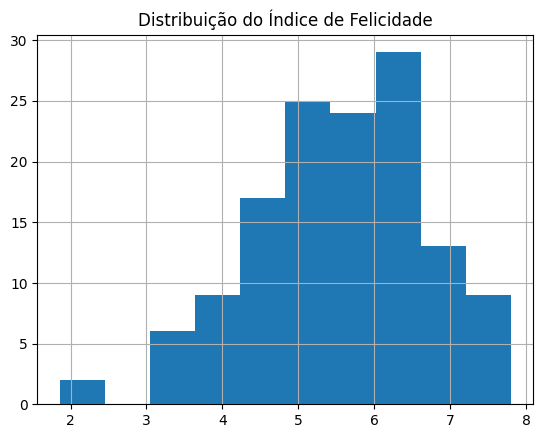

In [37]:
# Distribuição do Índice de Felicidade:
plt.title("Distribuição do Índice de Felicidade")
happiness_df["happiness"].hist()

In [38]:
# Média, moda e mediana da taxa de homícidios:
mean = homicide_df["rate"].mean()
median = homicide_df["rate"].median()
mode = max(set(list(homicide_df["rate"].values)), key=list(homicide_df["rate"].values).count)

print("A média da taxa de homicídios é: %.2f" % mean)
print("A mediana da taxa de homicídios é: %.2f" % median)
print("A moda da taxa de homicídios é: %.2f" % mode)

A média da taxa de homicídios é: 6.85
A mediana da taxa de homicídios é: 2.60
A moda da taxa de homicídios é: 0.00


<Axes: title={'center': 'Distribuição da Taxa de Homicídio'}>

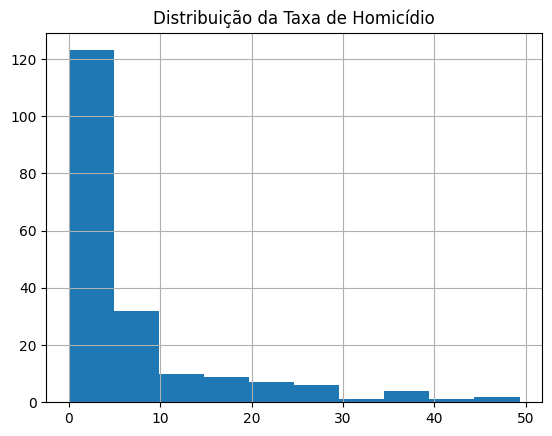

In [39]:
# Distribuição do Índice de Felicidade:
plt.title("Distribuição da Taxa de Homicídio")
homicide_df["rate"].hist()

- Pode-se perceber que existe uma maior quantidade de países com índice de felicidade alta (acima de 5), do que baixo. A disrirbuição não é Normal, pois tem um viés à esquerda.

- Percebe-se que no conjunto de dados de homicídios, a maior parte dos países possuem uma taxa de homicídio entre 0 a 20. Poucos países têm taxas muito altas, acima de 30.

##### 3 - Utilizando Groupby & Join

In [40]:
group = happiness_df.groupby(["date_of_data"]).count()
display(group)

,country,happiness,ranking
date_of_data,,,
2013 - 2022,126,126,126
2015 - 2022,1,1,1
2016 - 2022,2,2,2
2017 - 2022,4,4,4
2019 - 2022,1,1,1


- Dos 134 países, 126 tiveram os dados coletados de 2013 a 2022, ou seja, cerca de 94% da amostra possui dados coletados durante o maior período de tempo.

In [41]:
# Verificando quais países está presente nos dois datasets:
country_happ = list(happiness_df.country)
country_homi = list(homicide_df.country)

equal_countries = []

for c_01 in country_homi:
    for c_02 in country_happ:
        if c_01 == c_02:
            equal_countries.append(c_01)
print(len(equal_countries))

113


- Apenas 113 países, dos 134 no dataset de felicidade, estão também presentes no dataset de homícidios. Portanto, o join será feito apenas com estes 113 países.

In [42]:
# Utilizando Join para realizar o cruzamento entre os datasets de felicidade e homicídios, sendo o menor (de felicidade) a base:
joined_df = happiness_df.set_index("country").join(homicide_df.set_index("country"), how="left", lsuffix='_happiness', rsuffix='_homicide')
display(joined_df)

,happiness,ranking,date_of_data_happiness,rate,count,date_of_data_homicide
country,,,,,,
Finland,7.80,1,2013 - 2022,1.6,91.0,2020.0
Denmark,7.59,2,2013 - 2022,1.0,55.0,2020.0
Iceland,7.53,3,2013 - 2022,1.5,5.0,2020.0
Israel,7.47,4,2013 - 2022,1.5,125.0,2019.0
Netherlands,7.40,5,2013 - 2022,0.6,107.0,2020.0
...,...,...,...,...,...,...
DR Congo,3.21,130,2017 - 2022,NaN,NaN,NaN
Zimbabwe,3.20,131,2013 - 2022,7.5,981.0,2012.0
Sierra Leone,3.14,132,2013 - 2022,1.7,124.0,2015.0


- Como verificado anteriormente, apenas 113 paíes do dataset de felicidade também estão no dataset de homicídios. Desta forma, as linhas dos países que não estão em homicídios, ficaram com os valores NaN (Not a Number).

In [43]:
# Removendo países que ficaram com dados faltantes:
joined_df = joined_df.dropna()
display(joined_df)

,happiness,ranking,date_of_data_happiness,rate,count,date_of_data_homicide
country,,,,,,
Finland,7.80,1,2013 - 2022,1.6,91.0,2020.0
Denmark,7.59,2,2013 - 2022,1.0,55.0,2020.0
Iceland,7.53,3,2013 - 2022,1.5,5.0,2020.0
Israel,7.47,4,2013 - 2022,1.5,125.0,2019.0
Netherlands,7.40,5,2013 - 2022,0.6,107.0,2020.0
...,...,...,...,...,...,...
Botswana,3.44,129,2013 - 2022,15.2,303.0,2010.0
Zimbabwe,3.20,131,2013 - 2022,7.5,981.0,2012.0
Sierra Leone,3.14,132,2013 - 2022,1.7,124.0,2015.0
